In [1]:
from tensorflow.keras.datasets import reuters

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

In [3]:
len(train_data) , len(test_data)

(8982, 2246)

In [4]:
print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


In [5]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i,j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
from keras.utils.np_utils import to_categorical

In [7]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(46, activation = 'softmax')
])
model.compile(optimizer = "rmsprop",
             loss = "categorical_crossentropy",
             metrics=["accuracy"])

In [9]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [10]:
history = model.fit(partial_x_train, partial_y_train,
                   epochs = 20, batch_size = 512,
                   validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 45ms/step - loss: 2.8410 - accuracy: 0.4681 - val_loss: 1.9468 - val_accuracy: 0.6060
Epoch 2/20
16/16 [==============================] - 0s 25ms/step - loss: 1.6292 - accuracy: 0.6678 - val_loss: 1.4404 - val_accuracy: 0.6780
Epoch 3/20
16/16 [==============================] - 0s 26ms/step - loss: 1.2485 - accuracy: 0.7273 - val_loss: 1.2333 - val_accuracy: 0.7180
Epoch 4/20
16/16 [==============================] - 0s 23ms/step - loss: 1.0224 - accuracy: 0.7800 - val_loss: 1.1341 - val_accuracy: 0.7660
Epoch 5/20
16/16 [==============================] - 0s 25ms/step - loss: 0.8536 - accuracy: 0.8178 - val_loss: 1.0790 - val_accuracy: 0.7470
Epoch 6/20
16/16 [==============================] - 0s 25ms/step - loss: 0.7157 - accuracy: 0.8483 - val_loss: 0.9857 - val_accuracy: 0.7870
Epoch 7/20
16/16 [==============================] - 0s 24ms/step - loss: 0.6003 - accuracy: 0.8732 - val_loss: 0.9395 - val_accuracy: 0.8010
Epoch 8/20
16

In [15]:
history_dict = history.history

In [16]:
acc = history_dict['accuracy']

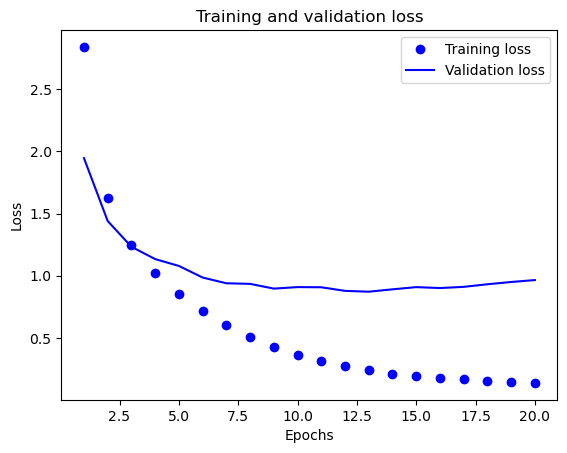

In [18]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

In [19]:
model = keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(46, activation = 'softmax')
])
model.compile(optimizer = "rmsprop",
             loss = "categorical_crossentropy",
             metrics=["accuracy"])
model.fit(x_train, y_train, epochs = 9, batch_size = 512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 20ms/step - loss: 2.5726 - accuracy: 0.5257
Epoch 2/9
18/18 [==============================] - 0s 20ms/step - loss: 1.3962 - accuracy: 0.7012
Epoch 3/9
18/18 [==============================] - 0s 19ms/step - loss: 1.0554 - accuracy: 0.7722
Epoch 4/9
18/18 [==============================] - 0s 19ms/step - loss: 0.8483 - accuracy: 0.8166
Epoch 5/9
18/18 [==============================] - 0s 19ms/step - loss: 0.6962 - accuracy: 0.8495
Epoch 6/9
18/18 [==============================] - 0s 19ms/step - loss: 0.5687 - accuracy: 0.8807
Epoch 7/9
18/18 [==============================] - 0s 22ms/step - loss: 0.4741 - accuracy: 0.8988
Epoch 8/9
18/18 [==============================] - 0s 22ms/step - loss: 0.3950 - accuracy: 0.9148
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.8940 - accuracy: 0.7947


In [20]:
results

[0.8939567804336548, 0.7947462201118469]

In [21]:
predictions  = model.predict(x_test)
predictions[0].shape

71/71 [==============================] - 0s 3ms/step


(46,)

In [22]:
np.sum(predictions[0])

1.0000001

In [23]:
np.argmax(predictions[0])

3

In [24]:
model = keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(4, activation = 'relu'),
    layers.Dense(46, activation = 'softmax')
])
model.compile(optimizer = "rmsprop",
             loss = "categorical_crossentropy",
             metrics=["accuracy"])
model.fit(partial_x_train, partial_y_train,
                   epochs = 20, batch_size = 512,
                   validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 35ms/step - loss: 3.5437 - accuracy: 0.1153 - val_loss: 3.2569 - val_accuracy: 0.2650
Epoch 2/20
16/16 [==============================] - 0s 24ms/step - loss: 3.0562 - accuracy: 0.2628 - val_loss: 2.8712 - val_accuracy: 0.2620
Epoch 3/20
16/16 [==============================] - 0s 24ms/step - loss: 2.7057 - accuracy: 0.2636 - val_loss: 2.6020 - val_accuracy: 0.2650
Epoch 4/20
16/16 [==============================] - 0s 24ms/step - loss: 2.4301 - accuracy: 0.2776 - val_loss: 2.3602 - val_accuracy: 0.2680
Epoch 5/20
16/16 [==============================] - 0s 24ms/step - loss: 2.1559 - accuracy: 0.2925 - val_loss: 2.1063 - val_accuracy: 0.2920
Epoch 6/20
16/16 [==============================] - 0s 25ms/step - loss: 1.8695 - accuracy: 0.3876 - val_loss: 1.8354 - val_accuracy: 0.5930
Epoch 7/20
16/16 [==============================] - 0s 24ms/step - loss: 1.6069 - accuracy: 0.6161 - val_loss: 1.6349 - val_accuracy: 0.6190
Epoch 8/20
16

# 표현층 개수 1개

In [26]:
model_1dense = keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(46, activation = 'softmax')
])
model_1dense.compile(optimizer = "rmsprop",
             loss = "categorical_crossentropy",
             metrics=["accuracy"])

history_1d = model_1dense.fit(partial_x_train, partial_y_train,
                   epochs = 20, batch_size = 512,
                   validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 40ms/step - loss: 2.6237 - accuracy: 0.5490 - val_loss: 1.8741 - val_accuracy: 0.6400
Epoch 2/20
16/16 [==============================] - 0s 26ms/step - loss: 1.5596 - accuracy: 0.7013 - val_loss: 1.4056 - val_accuracy: 0.7010
Epoch 3/20
16/16 [==============================] - 0s 23ms/step - loss: 1.1696 - accuracy: 0.7670 - val_loss: 1.1870 - val_accuracy: 0.7530
Epoch 4/20
16/16 [==============================] - 0s 23ms/step - loss: 0.9429 - accuracy: 0.8054 - val_loss: 1.0602 - val_accuracy: 0.7860
Epoch 5/20
16/16 [==============================] - 0s 24ms/step - loss: 0.7853 - accuracy: 0.8388 - val_loss: 0.9903 - val_accuracy: 0.7870
Epoch 6/20
16/16 [==============================] - 0s 26ms/step - loss: 0.6647 - accuracy: 0.8629 - val_loss: 0.9217 - val_accuracy: 0.8140
Epoch 7/20
16/16 [==============================] - 0s 24ms/step - loss: 0.5676 - accuracy: 0.8841 - val_loss: 0.8949 - val_accuracy: 0.8070
Epoch 8/20
16

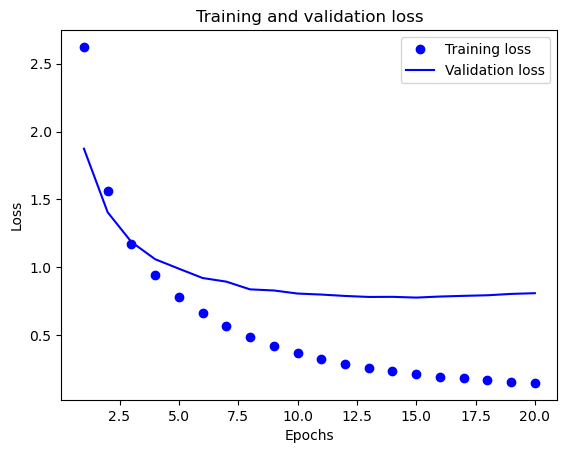

In [28]:
history_1d_dict = history_1d.history
loss_values_1d = history_1d_dict['loss'] 
val_loss_values_1d = history_1d_dict['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values_1d, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values_1d, 'b', label='Validation loss')
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

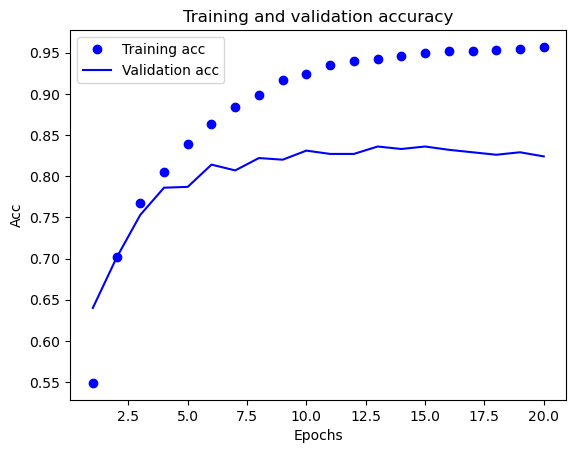

In [29]:
plt.clf() # 생성한 그래프를 clear
accuracy_1d = history_1d_dict['accuracy'] 
val_accuracy_1d = history_1d_dict['val_accuracy']
plt.plot(epochs, accuracy_1d, 'bo', label='Training acc') 
plt.plot(epochs, val_accuracy_1d, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs')
plt.ylabel('Acc') 
plt.legend()
plt.show()

In [30]:
model_1dense = keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(46, activation = 'softmax')
])
model_1dense.compile(optimizer = "rmsprop",
             loss = "categorical_crossentropy",
             metrics=["accuracy"])
model_1dense.fit(x_train, y_train, epochs = 4, batch_size = 512)

results_1d = model_1dense.evaluate(x_test, y_test)
results_1d

Epoch 1/4
18/18 [==============================] - 1s 19ms/step - loss: 2.4875 - accuracy: 0.5576
Epoch 2/4
18/18 [==============================] - 0s 19ms/step - loss: 1.4565 - accuracy: 0.7088
Epoch 3/4
18/18 [==============================] - 0s 19ms/step - loss: 1.0977 - accuracy: 0.7719
Epoch 4/4
71/71 [==============================] - 0s 3ms/step - loss: 1.0751 - accuracy: 0.7689


[1.0751240253448486, 0.7689225077629089]

# 표현층 3개

In [31]:
model_3dense = keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(46, activation = 'softmax')
])
model_3dense.compile(optimizer = "rmsprop",
             loss = "categorical_crossentropy",
             metrics=["accuracy"])

history_3d = model_3dense.fit(partial_x_train, partial_y_train,
                   epochs = 20, batch_size = 512,
                   validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 34ms/step - loss: 2.6789 - accuracy: 0.4268 - val_loss: 1.7819 - val_accuracy: 0.6160
Epoch 2/20
16/16 [==============================] - 0s 25ms/step - loss: 1.5909 - accuracy: 0.6537 - val_loss: 1.4528 - val_accuracy: 0.6740
Epoch 3/20
16/16 [==============================] - 0s 26ms/step - loss: 1.2814 - accuracy: 0.7112 - val_loss: 1.2611 - val_accuracy: 0.7060
Epoch 4/20
16/16 [==============================] - 1s 32ms/step - loss: 1.0718 - accuracy: 0.7542 - val_loss: 1.1491 - val_accuracy: 0.7300
Epoch 5/20
16/16 [==============================] - 0s 30ms/step - loss: 0.8892 - accuracy: 0.8068 - val_loss: 1.1103 - val_accuracy: 0.7430
Epoch 6/20
16/16 [==============================] - 0s 28ms/step - loss: 0.7509 - accuracy: 0.8358 - val_loss: 1.0062 - val_accuracy: 0.7810
Epoch 7/20
16/16 [==============================] - 0s 27ms/step - loss: 0.6292 - accuracy: 0.8612 - val_loss: 0.9665 - val_accuracy: 0.8010
Epoch 8/20
16

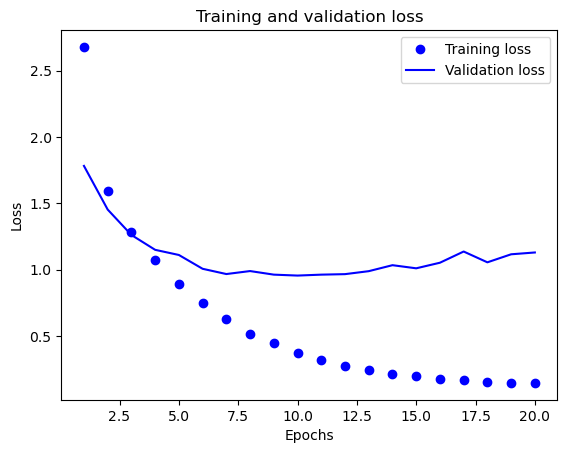

In [32]:
history_3d_dict = history_3d.history
loss_values_3d = history_3d_dict['loss'] 
val_loss_values_3d= history_3d_dict['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values_3d, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values_3d, 'b', label='Validation loss')
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()


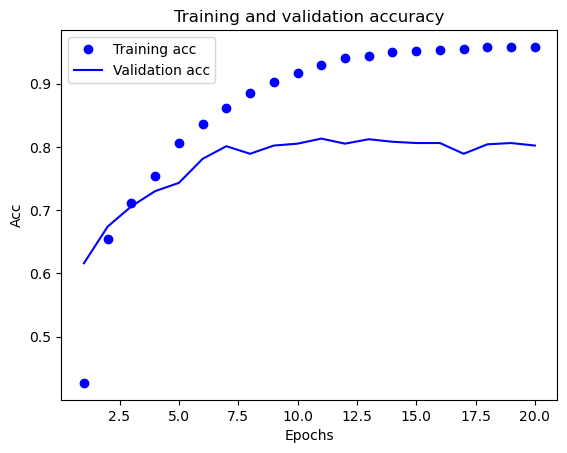

In [33]:
plt.clf() # 생성한 그래프를 clear
accuracy_3d = history_3d_dict['accuracy'] 
val_accuracy_3d = history_3d_dict['val_accuracy']
plt.plot(epochs, accuracy_3d, 'bo', label='Training acc') 
plt.plot(epochs, val_accuracy_3d, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs')
plt.ylabel('Acc') 
plt.legend()
plt.show()

In [34]:
model_3dense = keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(46, activation = 'softmax')
])
model_3dense.compile(optimizer = "rmsprop",
             loss = "categorical_crossentropy",
             metrics=["accuracy"])

model_3dense.fit(partial_x_train, partial_y_train,
                   epochs = 9, batch_size = 512,
                   validation_data = (x_val, y_val))
results_3d = model_3dense.evaluate(x_test, y_test)

results_3d

Epoch 1/9
16/16 [==============================] - 1s 42ms/step - loss: 2.8233 - accuracy: 0.3688 - val_loss: 1.8720 - val_accuracy: 0.5680
Epoch 2/9
16/16 [==============================] - 0s 28ms/step - loss: 1.6218 - accuracy: 0.6396 - val_loss: 1.4369 - val_accuracy: 0.6560
Epoch 3/9
16/16 [==============================] - 0s 27ms/step - loss: 1.2846 - accuracy: 0.7122 - val_loss: 1.2429 - val_accuracy: 0.7150
Epoch 4/9
16/16 [==============================] - 0s 26ms/step - loss: 1.0639 - accuracy: 0.7558 - val_loss: 1.1445 - val_accuracy: 0.7470
Epoch 5/9
16/16 [==============================] - 0s 24ms/step - loss: 0.9014 - accuracy: 0.7930 - val_loss: 1.0691 - val_accuracy: 0.7580
Epoch 6/9
16/16 [==============================] - 0s 26ms/step - loss: 0.7521 - accuracy: 0.8270 - val_loss: 1.0409 - val_accuracy: 0.7650
Epoch 7/9
16/16 [==============================] - 0s 25ms/step - loss: 0.6441 - accuracy: 0.8513 - val_loss: 1.0047 - val_accuracy: 0.7840
Epoch 8/9
16/16 [===

[1.0451267957687378, 0.771148681640625]

In [35]:
dense = ['1 dense', '2 dense', '3 dense']
accuracys = [results_1d[1], results[1], results_3d[1]]

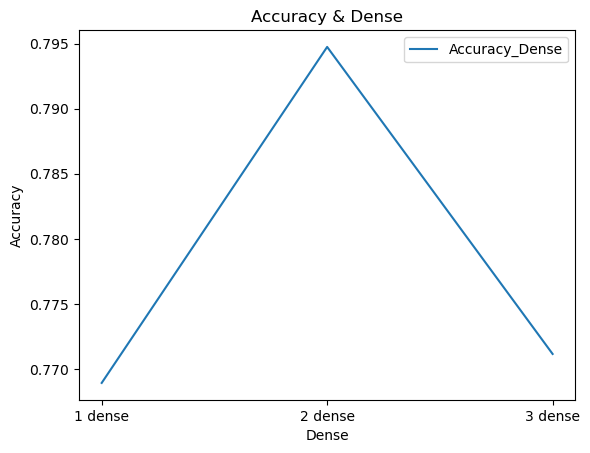

In [36]:
plt.plot(dense, accuracys, label='Accuracy_Dense')
plt.title('Accuracy & Dense') 
plt.xlabel('Dense')
plt.ylabel('Accuracy') 
plt.legend()
plt.show()

# 유닛 32개

In [37]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(32, activation = 'relu'),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(46, activation = 'softmax')
])
model.compile(optimizer = "rmsprop",
             loss = "categorical_crossentropy",
             metrics=["accuracy"])

In [38]:
history_32 = model.fit(partial_x_train, partial_y_train,
                   epochs = 20, batch_size = 512,
                   validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 28ms/step - loss: 3.1278 - accuracy: 0.4301 - val_loss: 2.3368 - val_accuracy: 0.5650
Epoch 2/20
16/16 [==============================] - 0s 18ms/step - loss: 1.9451 - accuracy: 0.6418 - val_loss: 1.6987 - val_accuracy: 0.6590
Epoch 3/20
16/16 [==============================] - 0s 17ms/step - loss: 1.4854 - accuracy: 0.6933 - val_loss: 1.4451 - val_accuracy: 0.6850
Epoch 4/20
16/16 [==============================] - 0s 17ms/step - loss: 1.2462 - accuracy: 0.7221 - val_loss: 1.3013 - val_accuracy: 0.7040
Epoch 5/20
16/16 [==============================] - 0s 17ms/step - loss: 1.0849 - accuracy: 0.7539 - val_loss: 1.2000 - val_accuracy: 0.7260
Epoch 6/20
16/16 [==============================] - 0s 18ms/step - loss: 0.9567 - accuracy: 0.7866 - val_loss: 1.1311 - val_accuracy: 0.7470
Epoch 7/20
16/16 [==============================] - 0s 19ms/step - loss: 0.8478 - accuracy: 0.8147 - val_loss: 1.0843 - val_accuracy: 0.7590
Epoch 8/20
16

In [39]:
model = keras.Sequential([
    layers.Dense(32, activation = 'relu'),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(46, activation = 'softmax')
])
model.compile(optimizer = "rmsprop",
             loss = "categorical_crossentropy",
             metrics=["accuracy"])
model.fit(x_train, y_train, epochs = 9, batch_size = 512)
results_32 = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 18ms/step - loss: 3.0852 - accuracy: 0.4508
Epoch 2/9
18/18 [==============================] - 0s 15ms/step - loss: 2.0148 - accuracy: 0.6147
Epoch 3/9
18/18 [==============================] - 0s 17ms/step - loss: 1.5109 - accuracy: 0.6851
Epoch 4/9
18/18 [==============================] - 0s 14ms/step - loss: 1.2463 - accuracy: 0.7192
Epoch 5/9
18/18 [==============================] - 0s 15ms/step - loss: 1.0724 - accuracy: 0.7580
Epoch 6/9
18/18 [==============================] - 0s 15ms/step - loss: 0.9401 - accuracy: 0.7906
Epoch 7/9
18/18 [==============================] - 0s 16ms/step - loss: 0.8278 - accuracy: 0.8181
Epoch 8/9
18/18 [==============================] - 0s 18ms/step - loss: 0.7311 - accuracy: 0.8407
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 1.0070 - accuracy: 0.7760


In [40]:
results

[0.8939567804336548, 0.7947462201118469]

# 유닛 개수 128개

In [41]:
model = keras.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(46, activation = 'softmax')
])
model.compile(optimizer = "rmsprop",
             loss = "categorical_crossentropy",
             metrics=["accuracy"])

In [42]:
history_128 = model.fit(partial_x_train, partial_y_train,
                   epochs = 20, batch_size = 512,
                   validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 45ms/step - loss: 2.2692 - accuracy: 0.5367 - val_loss: 1.5158 - val_accuracy: 0.6640
Epoch 2/20
16/16 [==============================] - 1s 35ms/step - loss: 1.2597 - accuracy: 0.7191 - val_loss: 1.1878 - val_accuracy: 0.7300
Epoch 3/20
16/16 [==============================] - 1s 34ms/step - loss: 0.9584 - accuracy: 0.7890 - val_loss: 1.0429 - val_accuracy: 0.7690
Epoch 4/20
16/16 [==============================] - 1s 33ms/step - loss: 0.7376 - accuracy: 0.8356 - val_loss: 0.9851 - val_accuracy: 0.7640
Epoch 5/20
16/16 [==============================] - 1s 33ms/step - loss: 0.5749 - accuracy: 0.8733 - val_loss: 0.9057 - val_accuracy: 0.7980
Epoch 6/20
16/16 [==============================] - 1s 33ms/step - loss: 0.4520 - accuracy: 0.9045 - val_loss: 0.8657 - val_accuracy: 0.8130
Epoch 7/20
16/16 [==============================] - 1s 34ms/step - loss: 0.3625 - accuracy: 0.9199 - val_loss: 0.8460 - val_accuracy: 0.8090
Epoch 8/20
16

In [43]:
model = keras.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(46, activation = 'softmax')
])
model.compile(optimizer = "rmsprop",
             loss = "categorical_crossentropy",
             metrics=["accuracy"])
model.fit(x_train, y_train, epochs = 9, batch_size = 512)
results_128 = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 30ms/step - loss: 2.2157 - accuracy: 0.5233
Epoch 2/9
18/18 [==============================] - 1s 29ms/step - loss: 1.2381 - accuracy: 0.7247
Epoch 3/9
18/18 [==============================] - 1s 29ms/step - loss: 0.9255 - accuracy: 0.7957
Epoch 4/9
18/18 [==============================] - 1s 29ms/step - loss: 0.7136 - accuracy: 0.8426
Epoch 5/9
18/18 [==============================] - 1s 30ms/step - loss: 0.5542 - accuracy: 0.8812
Epoch 6/9
18/18 [==============================] - 1s 36ms/step - loss: 0.4370 - accuracy: 0.9068
Epoch 7/9
18/18 [==============================] - 1s 31ms/step - loss: 0.3566 - accuracy: 0.9208
Epoch 8/9
18/18 [==============================] - 1s 31ms/step - loss: 0.2943 - accuracy: 0.9321
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9074 - accuracy: 0.8068


In [44]:
units = ['32unit', '64units', '128units']
accuracys = [results_32[1], results[1], results_128[1]]

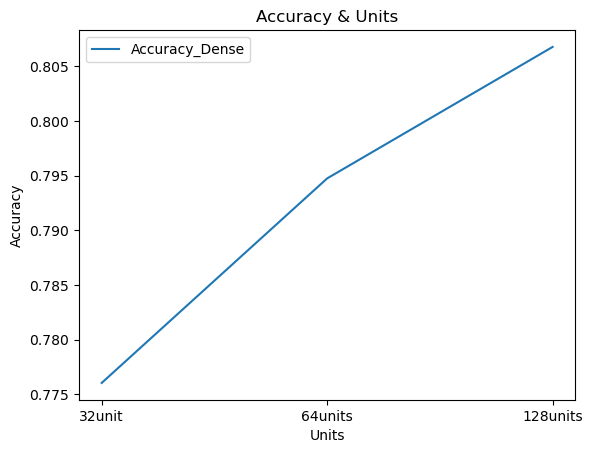

In [45]:
plt.plot(units, accuracys, label='Accuracy_Dense')
plt.title('Accuracy & Units') 
plt.xlabel('Units')
plt.ylabel('Accuracy') 
plt.legend()
plt.show()